In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA


df = pd.read_csv('/Users/marcoszavalatorres/Documents/DS/superstore/superstore.csv')
df.head()
# Import the necessary libraries

# Convert the date column to datetime format
df['OrderDate'] = pd.to_datetime(df['Order.Date'])

# Set the date column as the index
df.set_index('OrderDate', inplace=True)


df.head(10)



,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
OrderDate,,,,,,,,,,,,,,,,,,,,,
2011-01-07,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
2011-01-21,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2011-08-05,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
2011-08-05,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
2011-09-29,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
2011-10-19,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,1,2011-10-19 00:00:00.000,CA-2011-117317,...,13,Consumer,2011-10-19 00:00:00.000,Same Day,2.39,California,Paper,2011,North America,43
2011-11-04,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,1,2011-11-04 00:00:00.000,CA-2011-125829,...,19,Consumer,2011-11-11 00:00:00.000,Standard Class,1.15,California,Paper,2011,North America,45
2011-11-12,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,1,2011-11-12 00:00:00.000,CA-2011-151295,...,12,Consumer,2011-11-16 00:00:00.000,Standard Class,0.92,California,Paper,2011,North America,46
2011-11-22,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,1,2011-11-22 00:00:00.000,CA-2011-135090,...,54,Consumer,2011-11-26 00:00:00.000,Standard Class,6.98,California,Paper,2011,North America,48


In [37]:
df['Segment'].unique()


array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [38]:
# Filter the DataFrame to include only the rows where 'Country' is 'United States'
us_sales = df[df['Country'] == 'United States']

# Group by 'State' and sum the 'Sales'
state_sales = us_sales.groupby('State')['Sales'].sum()

# Find the state with the highest sales
most_selling_state = state_sales.idxmax()

print(f"The state with the highest sales in the United States is {most_selling_state}.")

The state with the highest sales in the United States is California.


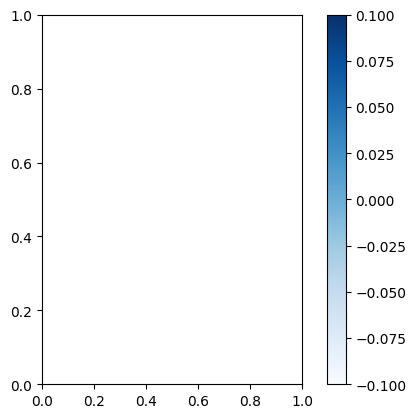

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt



In [40]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Get descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

Shape of the DataFrame: (51290, 27)

Data types of the columns:
Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

Number of missing values in each column:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        

     Year      Country  Total Sales
0    2011  Afghanistan         1728
1    2011      Albania         1707
2    2011      Algeria         8538
3    2011       Angola         6416
4    2011    Argentina         8737
..    ...          ...          ...
532  2014    Venezuela        10060
533  2014      Vietnam        19247
534  2014        Yemen          448
535  2014       Zambia         5396
536  2014     Zimbabwe         1443

[537 rows x 3 columns]


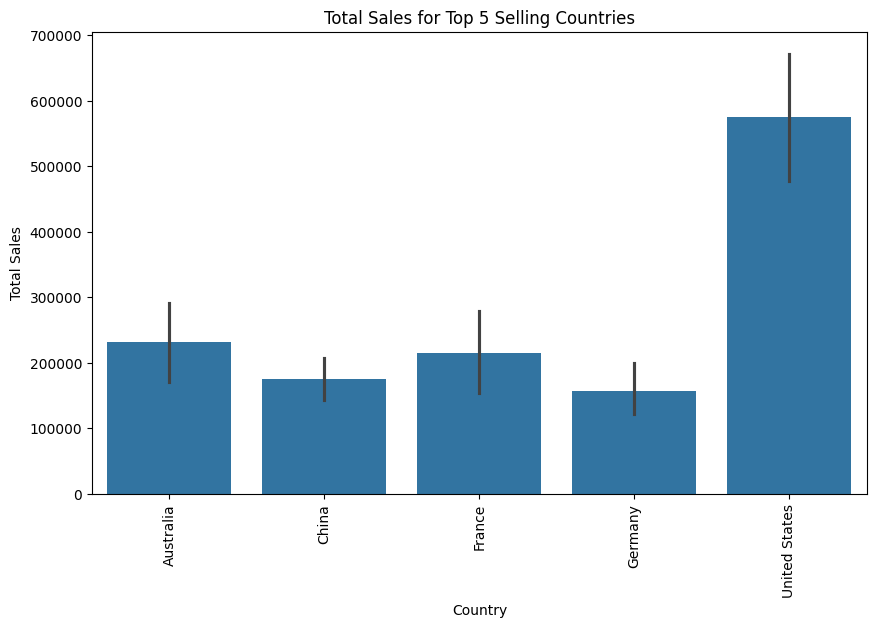

In [54]:
# Group the data by year and country and sum the sales
yearly_country_sales = df.groupby([df.index.year, 'Country'])['Sales'].sum()

# Convert the grouped data to a dataframe
df_yearly_country_sales = yearly_country_sales.reset_index()

# Rename the columns
df_yearly_country_sales.columns = ['Year', 'Country', 'Total Sales']

# Display the dataframe
print(df_yearly_country_sales)
# Filter the dataframe to include only the top 5 selling countries
top_5_countries = df_yearly_country_sales.groupby('Country')['Total Sales'].sum().nlargest(5).index
filtered_data = df_yearly_country_sales[df_yearly_country_sales['Country'].isin(top_5_countries)]

# Plot the total sales for the top 5 selling countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Total Sales', data=filtered_data)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 Selling Countries')
plt.xticks(rotation=90)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


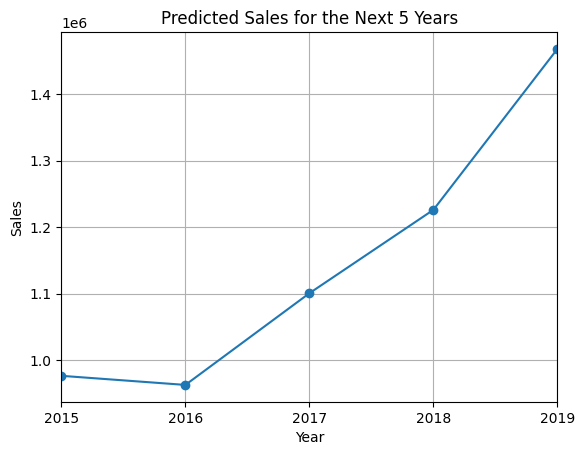

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(yearly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit(disp=False)

# Make predictions for the next 5 years
predictions = model_fit.predict(start=len(yearly_sales), end=len(yearly_sales)+4)

# Print the predictions
predictions.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Predicted Sales for the Next 5 Years')
plt.grid(True)
plt.show()


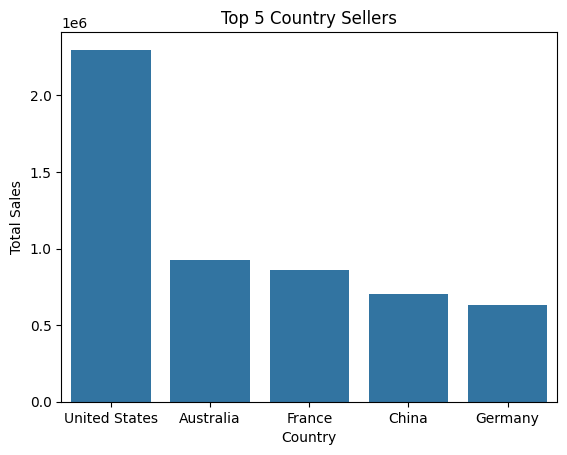

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by country and sum the sales
country_sales = df.groupby('Country')['Sales'].sum()

# Select the top 5 countries by sales
top_countries = country_sales.nlargest(5)

# Plot the sales for the top 5 countries
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 5 Country Sellers')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

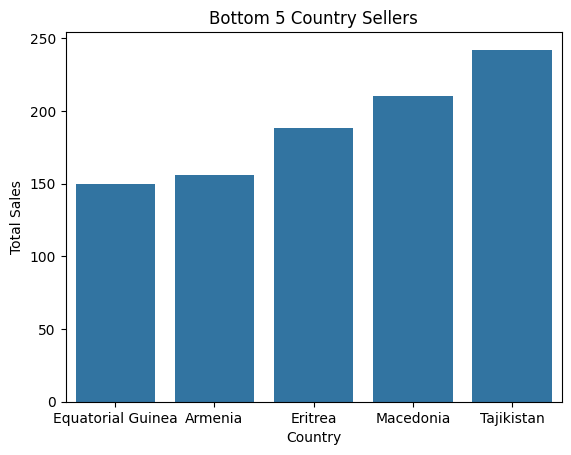

In [ ]:
# Select the bottom 5 countries by sales
bottom_countries = country_sales.nsmallest(5)

# Plot the sales for the bottom 5 countries
sns.barplot(x=bottom_countries.index, y=bottom_countries.values)
plt.title('Bottom 5 Country Sellers')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
print(filtered_data.head())

            Year  Sales  Cluster
OrderDate                       
2011-01-07  2011     19        1
2011-01-21  2011     19        1
2011-08-05  2011     21        1
2011-08-05  2011    111        1
2011-09-29  2011      6        1


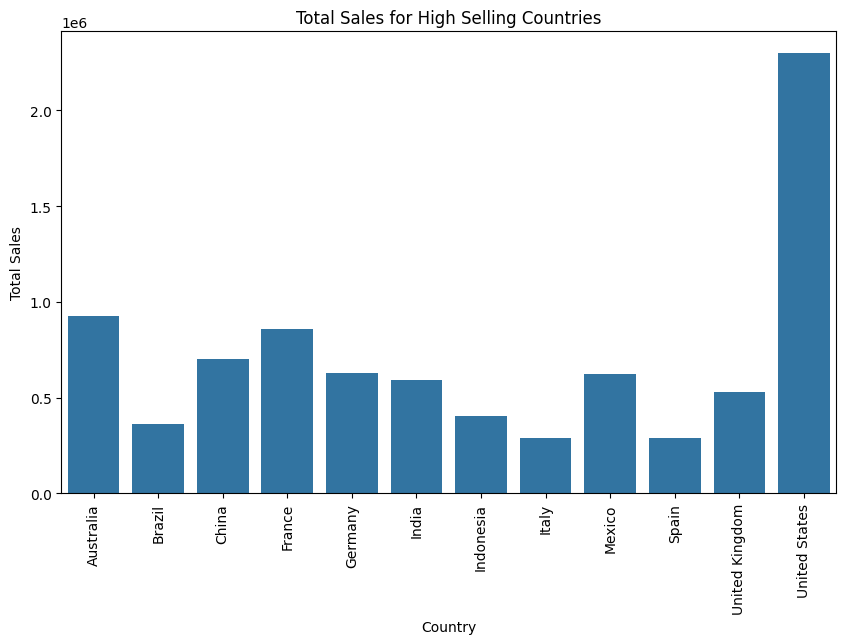

In [ ]:
# Calculate the total sales for each country
country_total_sales = df.groupby('Country')['Sales'].sum()

# Create a DataFrame from the series
country_total_sales_df = country_total_sales.reset_index()

# Set the sales threshold
sales_threshold = 200000  # Adjust this value based on your specific criteria

# Create a new column 'Sales Category' that indicates whether each country's total sales are above or below the threshold
country_total_sales_df['Sales Category'] = country_total_sales_df['Sales'].apply(lambda x: 'A' if x >= sales_threshold else 'B')

# Filter the DataFrame to include only high selling countries
high_selling_countries = country_total_sales_df[country_total_sales_df['Sales Category'] == 'A']

# Plot the total sales for each high selling country
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Sales', data=high_selling_countries)
plt.ylabel('Total Sales')
plt.title('Total Sales for High Selling Countries')
plt.xticks(rotation=90)
plt.show()

In [ ]:
highest_selling_category = df.groupby('Category')['Sales'].sum().idxmax()
print(f"The highest selling category is {highest_selling_category}.")


The highest selling category is Technology.


In [ ]:
top_5_categories = df.groupby('Category')['Sales'].sum().nlargest(3)
print(top_5_categories)


Category
Technology         4744691
Furniture          4110884
Office Supplies    3787330
Name: Sales, dtype: int64
